<a href="https://colab.research.google.com/github/omniaelmenshawy/Deep_learning_with_Tensorflow/blob/main/Tensorflow_Course_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Here are my Notes learning Deep Learning using Tensorflow.**

- We start by importing and uploading our dataset as follows:

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Getting the dataset

In [2]:
# Getting the dataset using wget:
!wget https://lazyprogrammer.me/course_files/arrhythmia.data

--2022-07-25 08:50:13--  https://lazyprogrammer.me/course_files/arrhythmia.data
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402355 (393K) [application/octet-stream]
Saving to: ‘arrhythmia.data’

arrhythmia.data     100%[===================>] 392.92K   906KB/s    in 0.4s    

2022-07-25 08:50:14 (906 KB/s) - ‘arrhythmia.data’ saved [402355/402355]



In [3]:
#list files in current directory:
!ls

arrhythmia.data  sample_data


In [4]:
#check if the data has a header
!head arrhythmia.data 

75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,

In [5]:
#check the data:
import pandas as pd

df = pd.read_csv('arrhythmia.data', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [6]:
#take the first few columns of the dataset:

data = df[[0,1,2,3,4,5,]]
data.columns = ['age', 'sex', 'height', "weight", 'QRS duration', 'P-R interval']

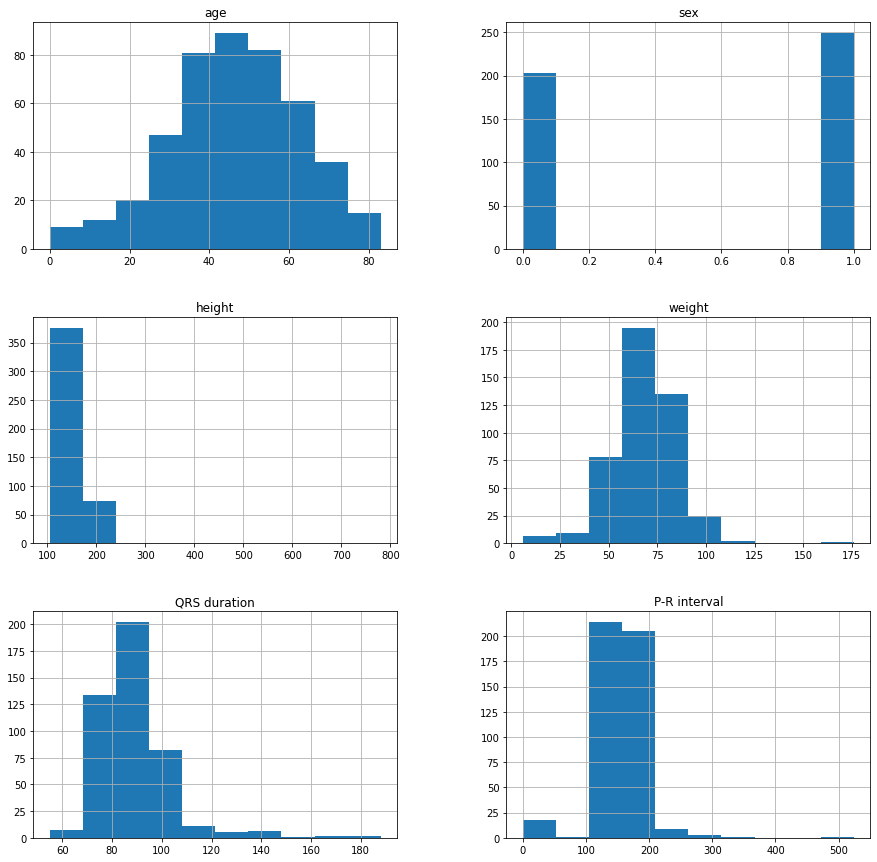

In [7]:

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,15]
data.hist(); # the semicolon is to supress return value


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faac7eaae90>,
      dtype=object)

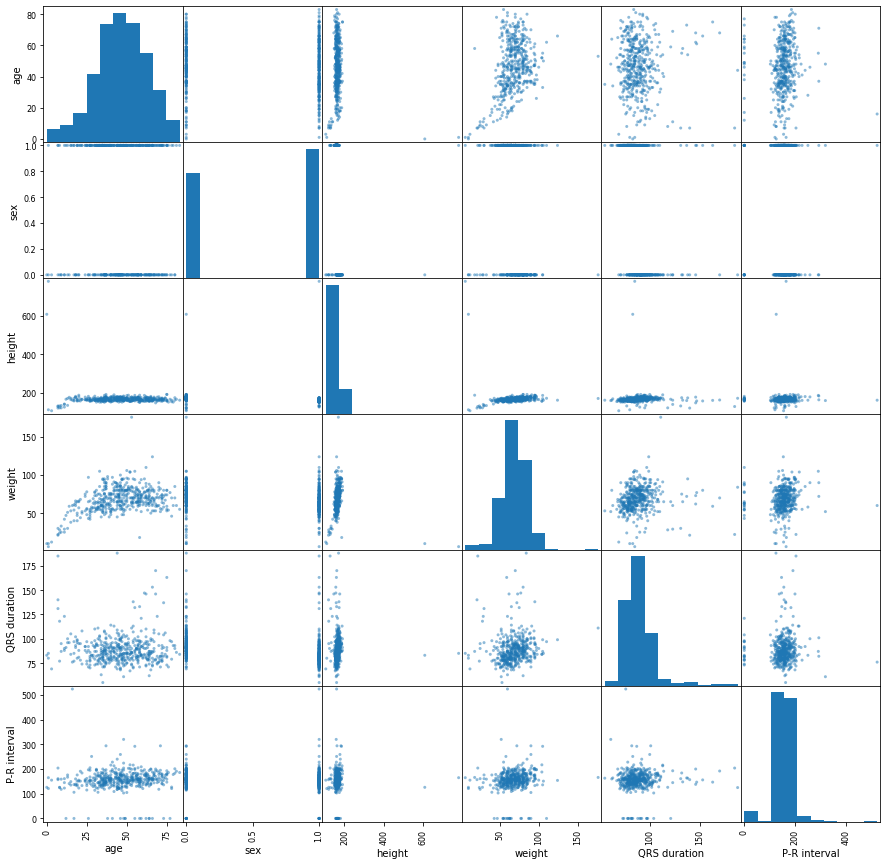

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)

# Getting the dataset using tf.keras

In [9]:
url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/auto-mpg.data'

In [10]:
# getting the data using tf keras:

tf.keras.utils.get_file('auto-mpg.data', url)

40960/30286 [========================================] - 0s 0us/step


'/root/.keras/datasets/auto-mpg.data'

In [11]:
#head command to view the head of the file:
!head /root/.keras/datasets/auto-mpg.data


18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


In [12]:
# working with the dataset as pandas file: 

df = pd.read_csv('/root/.keras/datasets/auto-mpg.data', header = None, delim_whitespace = True)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Classification theory

What is a line?

-  The Usual Line is y = mx+b
- For 2D Classification, the horizontal axis is x1, the vertical axis is x2, thus, x2 ? mx1 + b
### **w1x1 + w2x2 + b = 0**

The Decision Rule: How do we use that line to classify?

**- a = w1x1 + w2x2 + b --> can be wrtitten as y^ = u(a), where a is called the activation function.**

  if a >= 0, predict 1 (Positive)
  if a < 0, predict 0  (Negative)

**Sigmoid Function (S-shaped Curve) is to smooth the curve as follows:**

**-  y^ = σ(a), a = w1x1 + w2x2 + b**

- it behaves like a probability decision as p(y = 1 | x ) = σ(a), ,it is also called ***Logistic Function***


  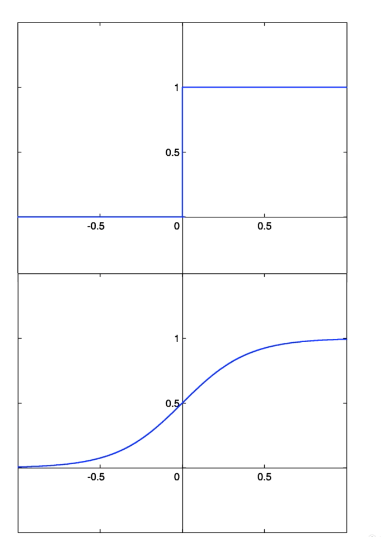








## How to implement this in tensorflow? 

### The Equation wx + b is implemented by the function called ***`Dense `***



1.   First we create an ***`Input`*** object to tell Keras the size of your object 
2.   Second we call the ***`Dense`*** function and we specify the output size ( as 1 in our case, and the activation function type)
3. Then we create a list and pass these two elements to the Keras model sequential object.
4. The next thing is thinking before how to **train or fit our model**:
  - We Start by defining a cost/ ***`loss`*** function (like the activation function) 
  - Then we pass it to the function ***`model.compile`***
  - The ***`optimizer`*** is our strategy to specify the cost function and then taking small steps down the cost function untill we get to the bottom, which is generaly known as **Gradient Descent**.
  The default of the ptimizer is called ***`"adam"`*** (which automatically tells tensorflow to use this algorithm to minimize the cost function).
  - The other argument given to the compilation process is the ***`metrics`*** argument which allows you to pass a list of various metrics to tensorflow to keep track of. In our case, the metrics that we are using is the ***`accuracy`***.
    
    **Accuracy means, out of all our predictions, how many of them were correct:**
        
        Accuracy = n correct/ n total 
5. The last step then is the process of **training and fiting** using the ***`model.fit`*** function.
  - it takes the two arguments of ***`x_train`*** and ***`y_train`***.
  - number of iteration in deep learning is called ***`epochs`***.
  - ***`Validation_data`*** argument allows us to evaluate our model on a set of x and y data points that are not in the training set.






## Linear Classification Example:
- The goal is to predict wether a patient's diagnosis of breast tissue is malignant or benign.


In [13]:
from sklearn.datasets import load_breast_cancer 
df = load_breast_cancer ()

In [14]:
type(df)

sklearn.utils.Bunch

`Bunch` objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key, bunch["value_key"], or by an attribute, bunch.value_key.

In [15]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
# We have 30 Features and 569 Samples
df.data.shape

(569, 30)

In [17]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [18]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [19]:
df.target.shape

(569,)

In [20]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size = 0.33)
N, D = x_train.shape

### **Standard Scaller:**

- Standarization or Normalization is basically subtracting the mean and deviding by the standard deviation to make the weghits less sensetive the the values in the dataset.

z = (x - µ ) / σ

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Building the model:

In [23]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(D,)),
        tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [24]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [25]:
r = model.fit( x_train, y_train, validation_data=(x_test, y_test), epochs = 100)


Epoch 1/100
12/12 [==============================] - 5s 39ms/step - loss: 0.5904 - accuracy: 0.7244 - val_loss: 0.5536 - val_accuracy: 0.7340
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5385 - accuracy: 0.7638 - val_loss: 0.5067 - val_accuracy: 0.7606
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4930 - accuracy: 0.7874 - val_loss: 0.4661 - val_accuracy: 0.7979
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4543 - accuracy: 0.8136 - val_loss: 0.4308 - val_accuracy: 0.8245
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4214 - accuracy: 0.8373 - val_loss: 0.4003 - val_accuracy: 0.8351
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 0.3931 - accuracy: 0.8399 - val_loss: 0.3730 - val_accuracy: 0.8617
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 0.3675 - accuracy: 0.8530 - val_loss: 0.3497 - val_accuracy: 0.8617
Epoch 8/10

In [26]:
print("Train Score is: ", model.evaluate(x_train, y_train))
print("Test Score is: ", model.evaluate(x_test, y_test))

12/12 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9816
Train Score is:  [0.07648292183876038, 0.9816272854804993]
6/6 [==============================] - 0s 4ms/step - loss: 0.0958 - accuracy: 0.9840
Test Score is:  [0.0958465039730072, 0.9840425252914429]


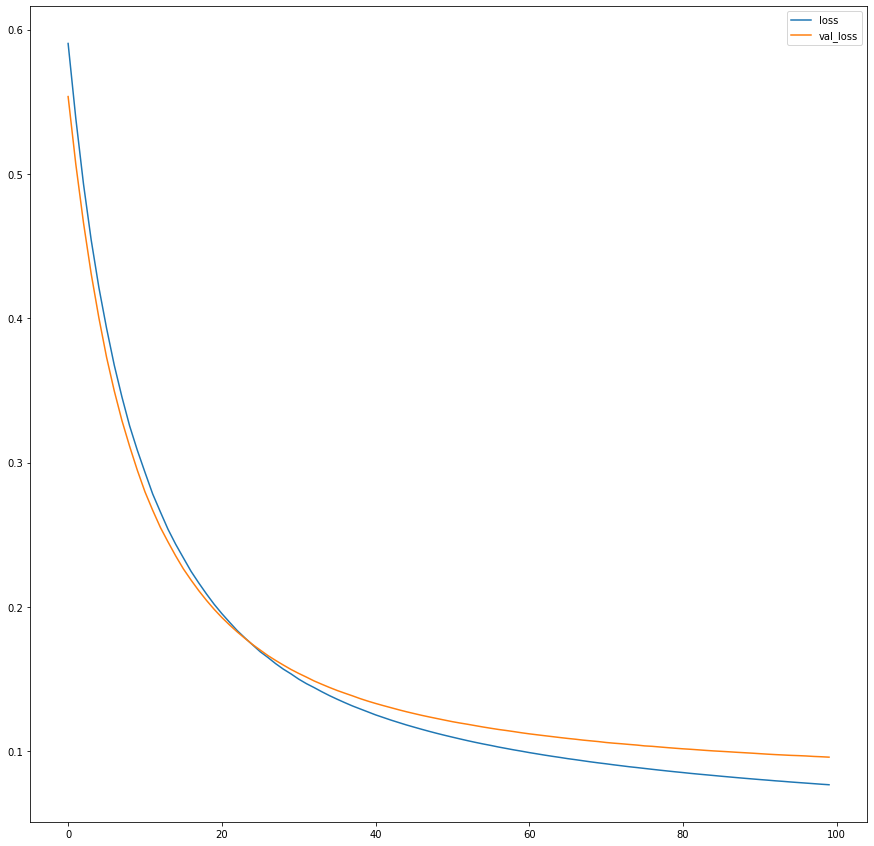

In [27]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

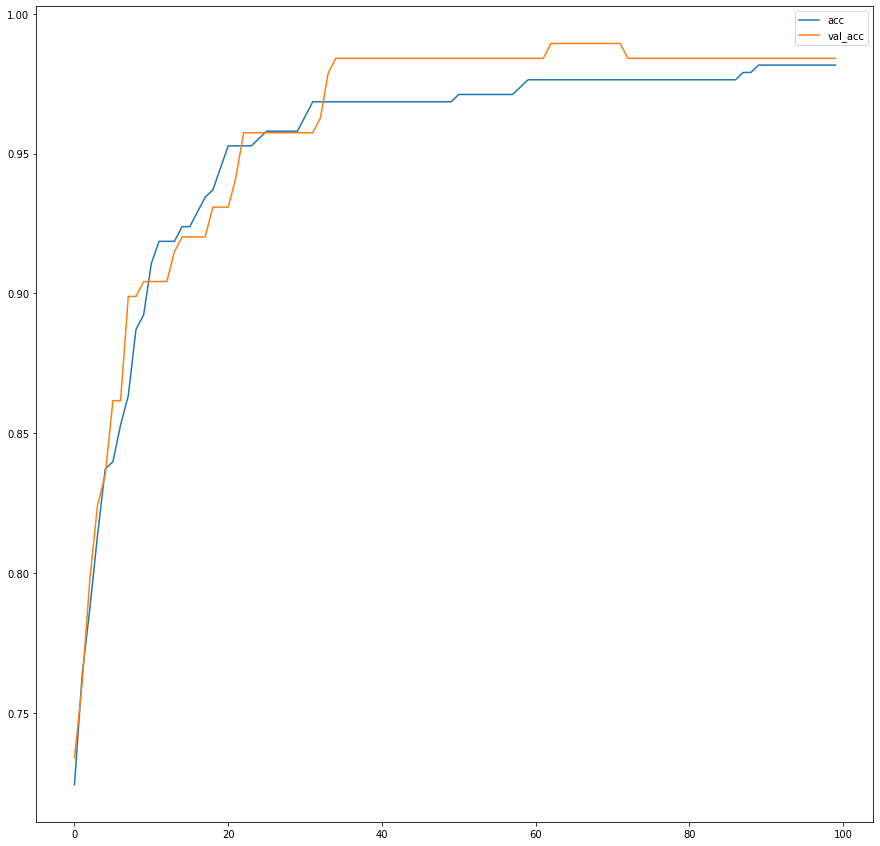

In [28]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

# Linear Regression:

- for one input: **y^ = mx+b** 

- Here we don't use activation function sense the output is already any number, thus we use the ***`Dense`*** function and passe the ***`activation=None`*** parameter to it.

- Loss Function in linear regression is the MSE.

In [29]:
!wget http://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-07-25 08:50:43--  http://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv [following]
--2022-07-25 08:50:43--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-07-25 08:50:43 (52.9 MB/s) - ‘moore.csv’ saved [2302/230

In [30]:
data = pd.read_csv('moore.csv', header=None).values
x = data[:,0].reshape(-1,1)
y = data[:,1]

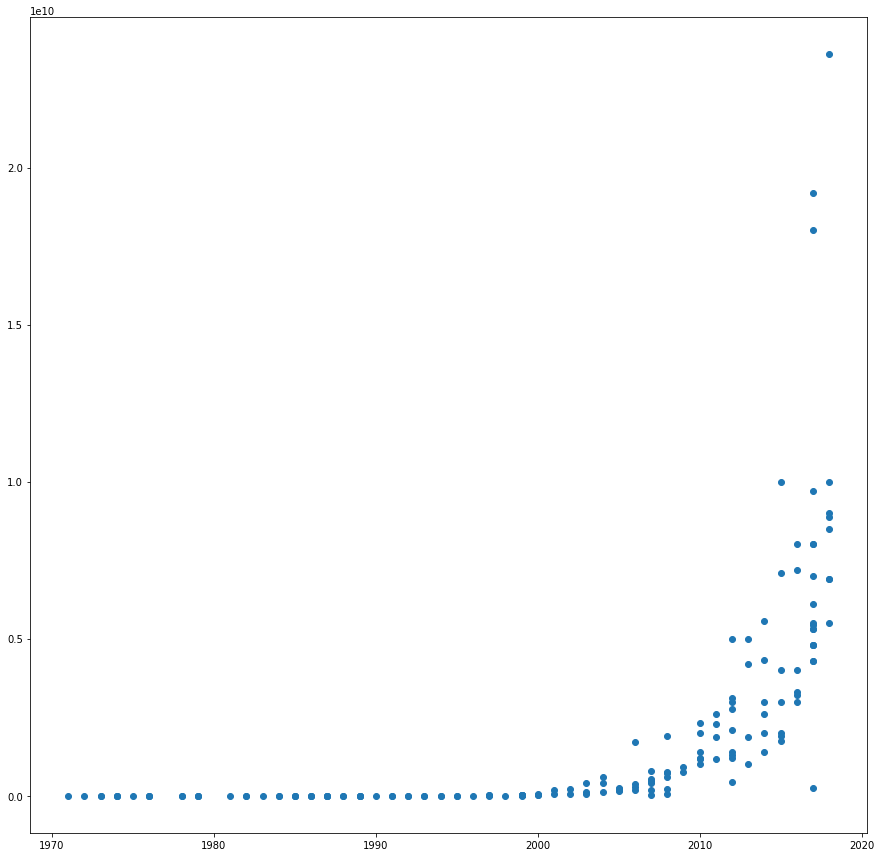

In [31]:
plt.scatter(x,y)

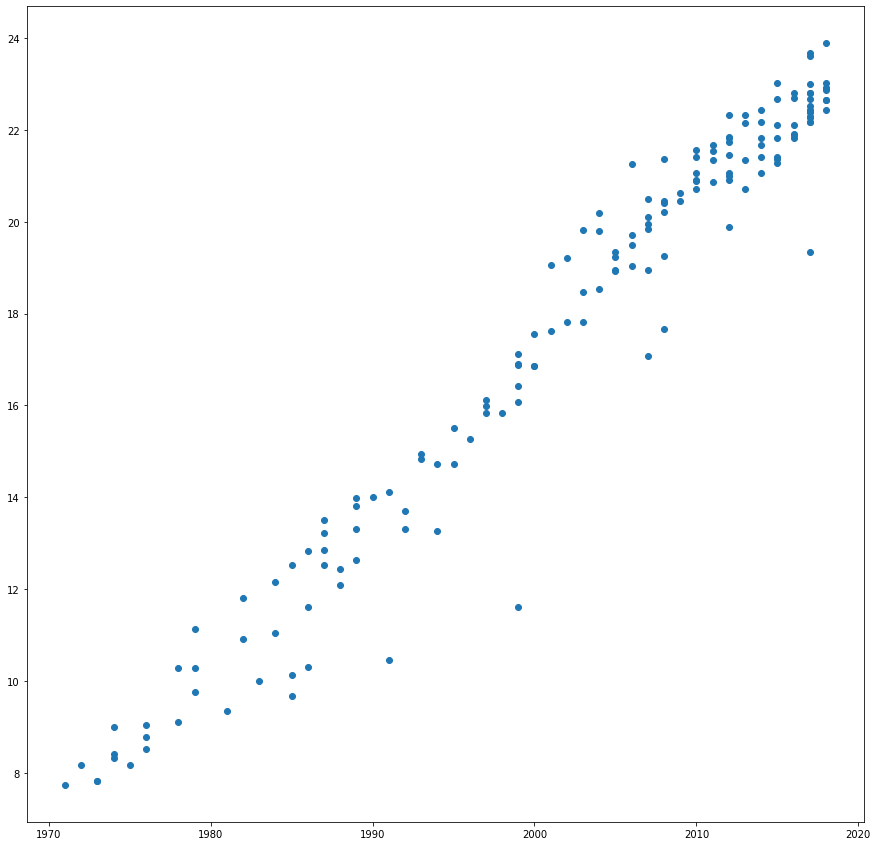

In [32]:
import numpy as np

y = np.log(y)
plt.scatter(x,y)

In [33]:
x = x-x.mean()

In [34]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(1)])



model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)   
r= model.fit(x,y, epochs=200, callbacks=[scheduler])



Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 325.8093 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 303.3455 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 283.3918 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 266.4670 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 201.6547 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 122.0121 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 124.2066 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 63.2916 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 51.0762 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 34.2210 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 

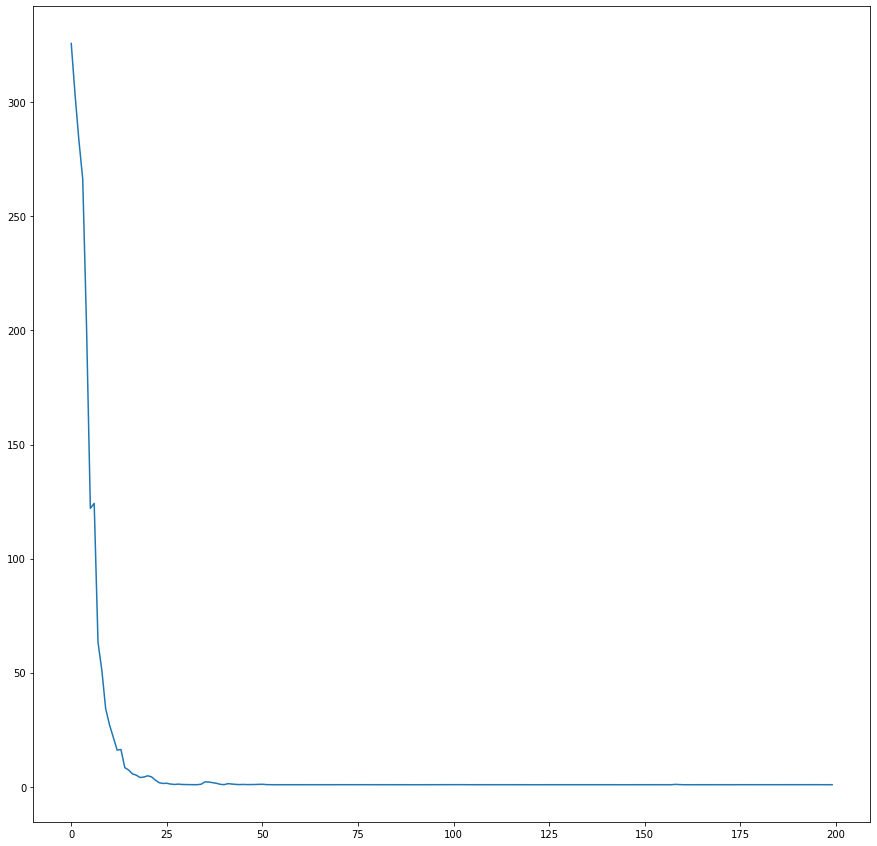

In [35]:
plt.plot(r.history['loss'], label='loss')

In [36]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3356762]], dtype=float32), array([17.770172], dtype=float32)]


In [37]:
#the slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

In [38]:
print('Time to double: ', np.log(2)/a)

Time to double:  2.0649280304186726


In [39]:
#Here is the analytical solution for linear regression:

x = np.array(x).flatten()
y = np.array(y)
denominator = x.dot(x) - x.mean() * x.sum()
a = (x.dot(y) - y.mean()*x.sum()) / denominator 
b = ( y.mean() * x.dot(x)- x.mean() * x.dot(y)) / denominator
print(a,b)
print('Time to double: ', np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double:  2.0286295205239204
